In [1]:
import numpy as np
import tcbench as tcb
from functions import (extract_results_limits,
                       extract_results_limits_splits, 
                       plot_results,
                       plot_results_splits)

In [2]:
vectors_baseline = np.load('artifacts-mirage19/baseline_vectors.npy')
labels_baseline = np.load('artifacts-mirage19/baseline_labels.npy')
vectors_embeddings = np.load('artifacts-mirage19/embeddings_vectors.npy')
labels_embeddings = np.load('artifacts-mirage19/embeddings_labels.npy')

In [3]:
df_split = tcb.load_parquet(tcb.DATASETS.MIRAGE19, min_pkts=10, split=True)
train_val_indices = np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]])
test_indices = df_split.iloc[0][2]

In [4]:
samples = [10, 100, 1000]
percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99]

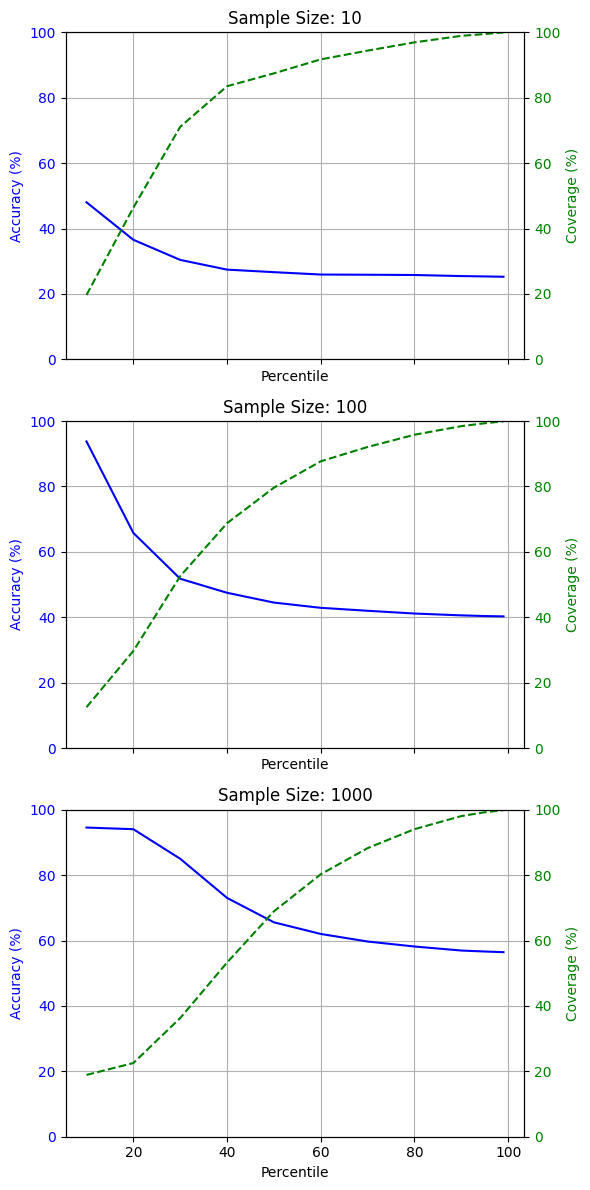

In [5]:
coverage_results_baseline, accuracy_results_baseline = extract_results_limits(vectors_baseline, labels_baseline, train_val_indices, test_indices, 'euclidean', 'distance', samples, percentiles)
plot_results(coverage_results_baseline, accuracy_results_baseline, samples, percentiles, percentile=True)

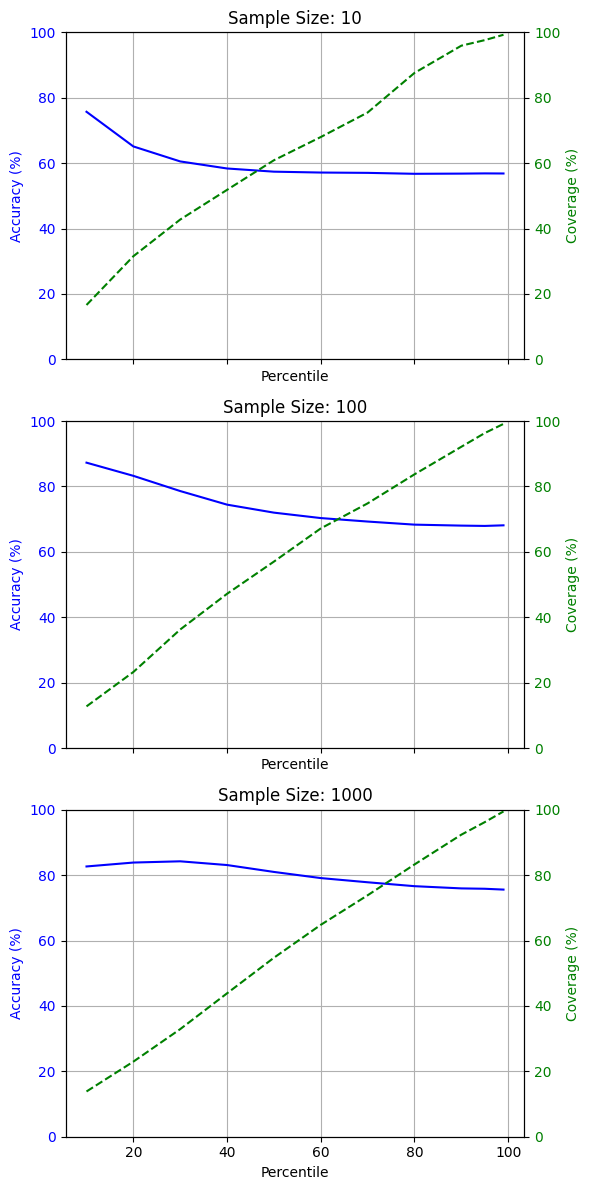

In [6]:
coverage_results_embeddings, accuracy_results_embeddings = extract_results_limits(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'euclidean', 'distance', samples, percentiles)
plot_results(coverage_results_embeddings, accuracy_results_embeddings, samples, percentiles, percentile=True)

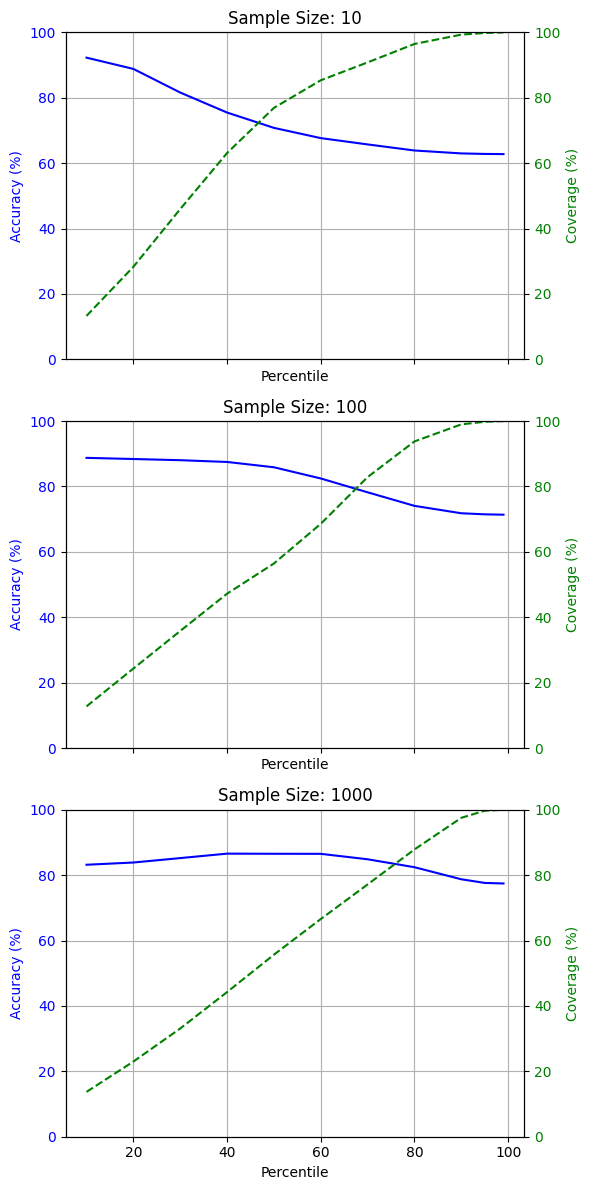

In [7]:
coverage_results_embeddings_cosine, accuracy_results_embeddings_cosine, = extract_results_limits(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'cosine', 'similarity', samples, percentiles)
plot_results(coverage_results_embeddings_cosine, accuracy_results_embeddings_cosine, samples, percentiles, percentile=True)

In [8]:
train_test_splits = [
    (np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]]), df_split.iloc[0][2]),
    (np.concatenate([df_split.iloc[1][0], df_split.iloc[1][1]]), df_split.iloc[1][2]),
    (np.concatenate([df_split.iloc[2][0], df_split.iloc[2][1]]), df_split.iloc[2][2]),
    (np.concatenate([df_split.iloc[3][0], df_split.iloc[3][1]]), df_split.iloc[3][2]),
    (np.concatenate([df_split.iloc[4][0], df_split.iloc[4][1]]), df_split.iloc[4][2])
]

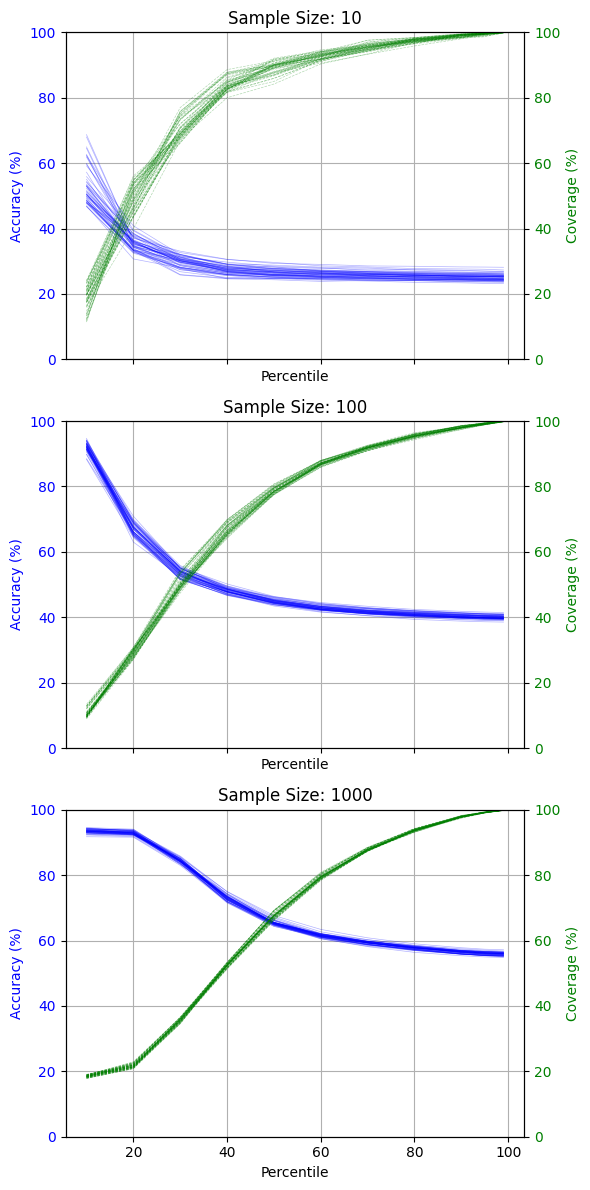

In [9]:
coverage_results_baseline_splits, accuracy_results_baseline_splits = extract_results_limits_splits(vectors_baseline, labels_baseline, train_test_splits, 'euclidean', 'distance', samples, percentiles)
plot_results_splits(coverage_results_baseline_splits, accuracy_results_baseline_splits, samples, percentiles, percentile=True)

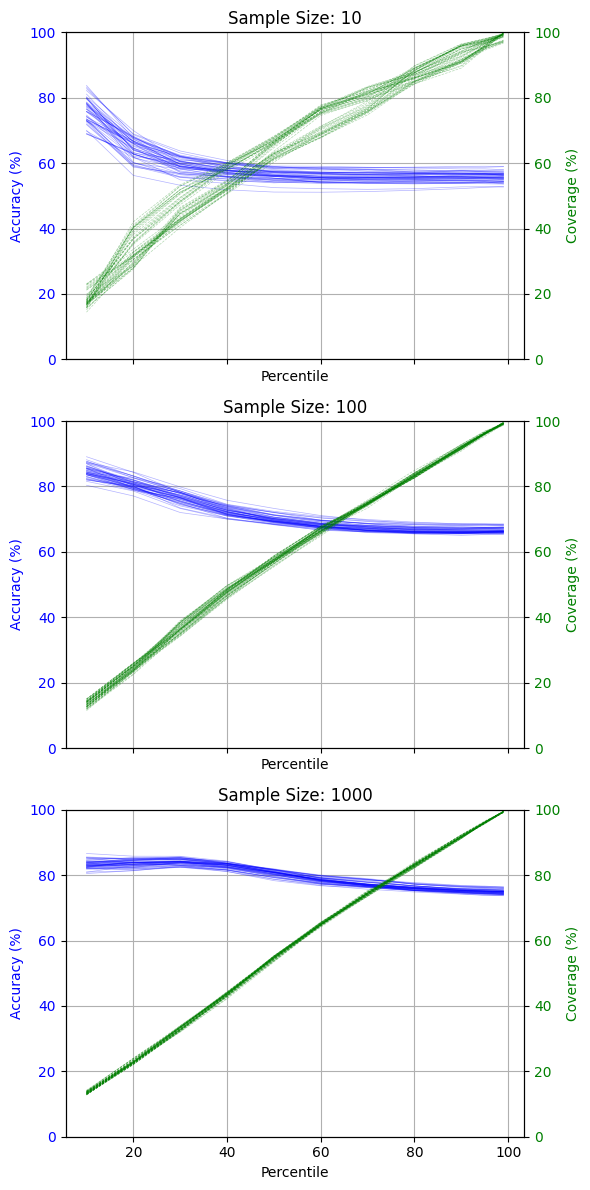

In [10]:
coverage_results_embeddings_splits, accuracy_results_embeddings_splits = extract_results_limits_splits(vectors_embeddings, labels_embeddings, train_test_splits, 'euclidean', 'distance', samples, percentiles)
plot_results_splits(coverage_results_embeddings_splits, accuracy_results_embeddings_splits, samples, percentiles, percentile=True)

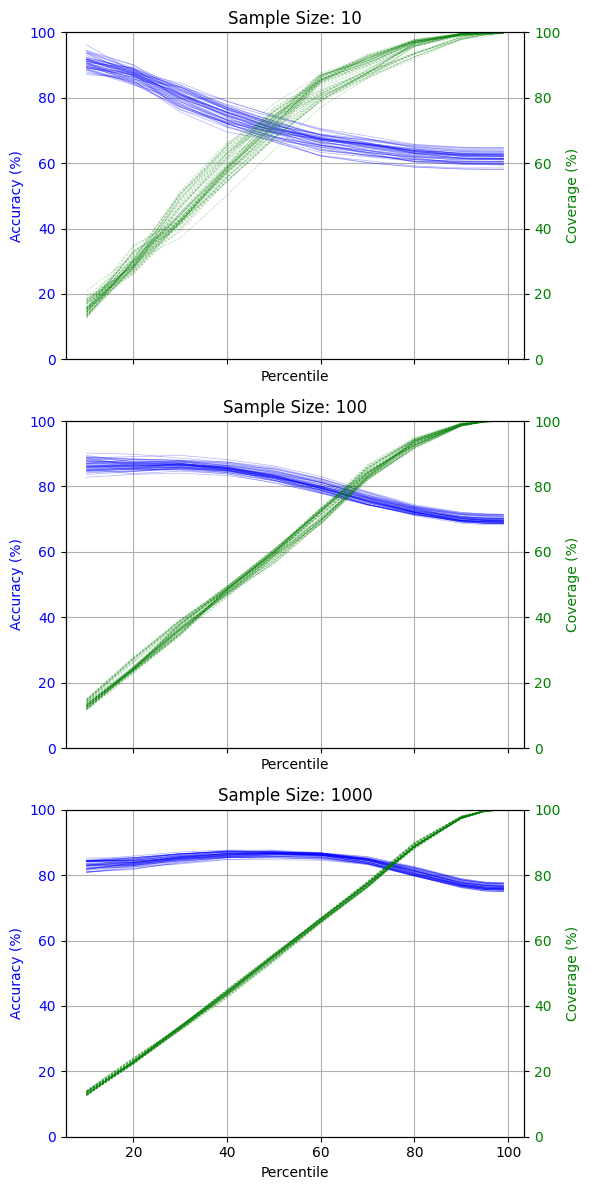

In [11]:
coverage_results_embeddings_cosine_splits, accuracy_results_embeddings_cosine_splits = extract_results_limits_splits(vectors_embeddings, labels_embeddings, train_test_splits, 'cosine', 'similarity', samples, percentiles)
plot_results_splits(coverage_results_embeddings_cosine_splits, accuracy_results_embeddings_cosine_splits, samples, percentiles, percentile=True)